# Task 1

In [1]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
print("Missing Values Check")
df.isna().sum()

Missing Values Check


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 2D

# Task 2

In [34]:
# Feature Selection for clusterig
X2 = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
scaled2_df = pd.DataFrame(X2_scaled, columns= ["Income", "Spendings"])
scaled2_df

,Income,Spendings
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


# Task 3

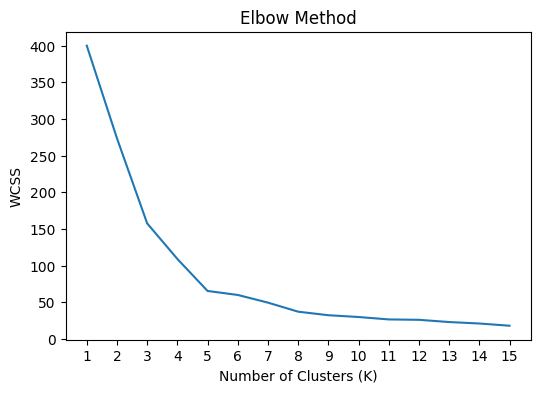

In [36]:
# Finding optimal K using Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss2 = []
for i in range(1, 16):
    k2means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k2means.fit(X2_scaled)
    wcss2.append(k2means.inertia_)

plt.figure(figsize=(6, 4)) 
plt.plot(range(1, 16), wcss2) 
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 16))
plt.show()

In [37]:
# above graph showing that at 3 a fast drop is ending then what we should select?
# Using silhouette_score for direct answer
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    km2 = KMeans(n_clusters=k, random_state=42)
    labels = km2.fit_predict(X2_scaled)
    score = silhouette_score(X2_scaled, labels)
    print(f"For K={k}, Silhouette Score is: {score:.4f}")

For K=2, Silhouette Score is: 0.3973
For K=3, Silhouette Score is: 0.4666
For K=4, Silhouette Score is: 0.4943
For K=5, Silhouette Score is: 0.5547
For K=6, Silhouette Score is: 0.5138
For K=7, Silhouette Score is: 0.5020


# Task 4

In [40]:
# K=5 is nearest to 1

kmeans2 = KMeans(n_clusters=5, init='k-means++', random_state=42)
y2_kmeans = kmeans2.fit_predict(X2_scaled)
y2_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

# Task 5

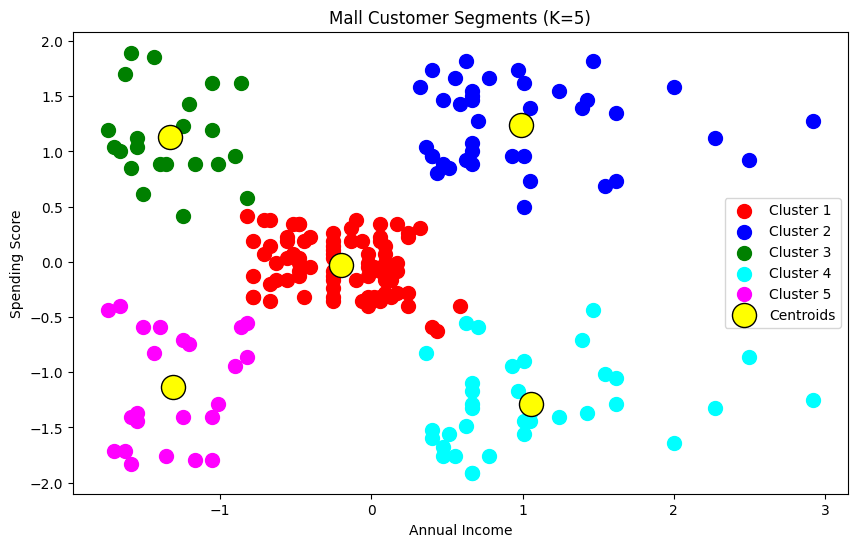

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Har cluster ko alag color ke saath plot karna
plt.scatter(X2_scaled[y2_kmeans == 0, 0], X2_scaled[y2_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X2_scaled[y2_kmeans == 1, 0], X2_scaled[y2_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X2_scaled[y2_kmeans == 2, 0], X2_scaled[y2_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X2_scaled[y2_kmeans == 3, 0], X2_scaled[y2_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X2_scaled[y2_kmeans == 4, 0], X2_scaled[y2_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Centroids (Centers) ko highlight karna
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', edgecolors='black')

plt.title('Mall Customer Segments (K=5)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# 3D

# Task 2 

In [43]:
# Feature Selection for clusterig including Age column making it 3D
X3 = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X3

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X)
scaled3_df = pd.DataFrame(X3_scaled, columns= ["Age", "Income", "Spendings"])
scaled3_df

,Age,Income,Spendings
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


# Task 3

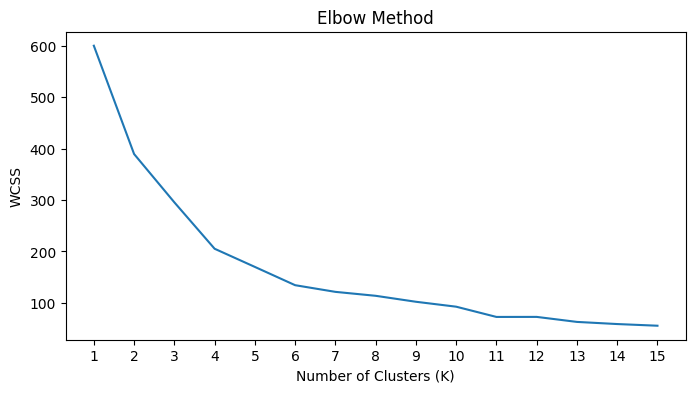

In [48]:
# Finding optimal K using Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss3 = []
for i in range(1, 16):
    k3means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k3means.fit(X3_scaled)
    wcss3.append(k3means.inertia_)

plt.figure(figsize=(8, 4)) 
plt.plot(range(1, 16), wcss3) 
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 16)) 
plt.show()

In [49]:
# above graph showing that at 4 a fast drop is ending then what we should select?
# Using silhouette_score for direct answer
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X3_scaled)
    score = silhouette_score(X3_scaled, labels)
    print(f"For K={k}, Silhouette Score is: {score:.4f}")

For K=2, Silhouette Score is: 0.3355
For K=3, Silhouette Score is: 0.3579
For K=4, Silhouette Score is: 0.4040
For K=5, Silhouette Score is: 0.4085
For K=6, Silhouette Score is: 0.4311
For K=7, Silhouette Score is: 0.4101


# Task 4

In [50]:
# K=6 is nearest to 1

kmeans3 = KMeans(n_clusters=6, init='k-means++', random_state=42)
y3_kmeans = kmeans3.fit_predict(X3_scaled)
y3_kmeans

array([2, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1,
       3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 0, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

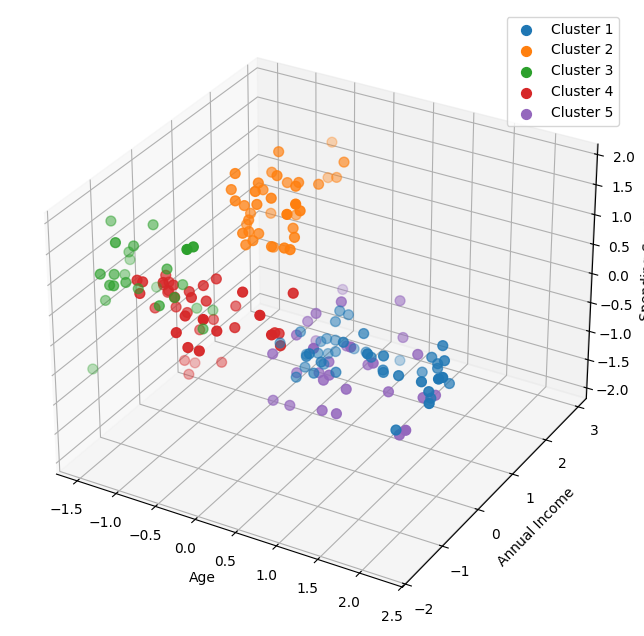

In [52]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X3_scaled[y3_kmeans == 0, 0], X3_scaled[y3_kmeans == 0, 1], X3_scaled[y3_kmeans == 0, 2], s=50, label='Cluster 1')
ax.scatter(X3_scaled[y3_kmeans == 1, 0], X3_scaled[y3_kmeans == 1, 1], X3_scaled[y3_kmeans == 1, 2], s=50, label='Cluster 2')
ax.scatter(X3_scaled[y3_kmeans == 2, 0], X3_scaled[y3_kmeans == 2, 1], X3_scaled[y3_kmeans == 2, 2], s=50, label='Cluster 3')
ax.scatter(X3_scaled[y3_kmeans == 3, 0], X3_scaled[y3_kmeans == 3, 1], X3_scaled[y3_kmeans == 3, 2], s=50, label='Cluster 4')
ax.scatter(X3_scaled[y3_kmeans == 4, 0], X3_scaled[y3_kmeans == 4, 1], X3_scaled[y3_kmeans == 4, 2], s=50, label='Cluster 5')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.legend()
plt.show()

# Task 6

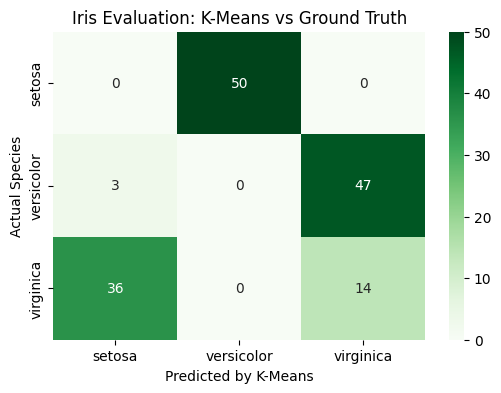

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150



In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Iris Data Load karein (Contains 3 species)
iris = load_iris()
X_iris = iris.data
y_true = iris.target # Labels

# 2. K-Means apply karein (K=3 because 3 species)
kmeans_iris = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans_iris.fit_predict(X_iris)

# 3. Visualization of Evaluation
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted by K-Means')
plt.ylabel('Actual Species')
plt.title('Iris Evaluation: K-Means vs Ground Truth')
plt.show()

# Classification report (Note: Cluster numbers may not match label numbers directly)
print(classification_report(y_true, y_pred))